In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import decomposition
from matplotlib import pyplot as plt
from sklearn import neighbors

from repeated_CV_builder import DCV

In [7]:
# imports the data
data = pd.read_csv("raw_data/train_call.txt", index_col=0, delimiter="\t").transpose()
topInfo = data.iloc[:3]
data = data.iloc[4:].dropna(axis=1)
classes = pd.read_csv("raw_data/train_clinical.txt", delimiter="\t", index_col=0)
data = classes.join(data).set_index("Subgroup").dropna()
# Add 1 to data because of chi-square feature selection


DCV.outer_repeats = 5
DCV.inner_repeats = 10
DCV.num_features = 150

model = linear_model.LogisticRegression(penalty="elasticnet", max_iter=10000, multi_class='ovr', solver='saga')
modeller = DCV(model)
# prints all the params you can change :)
print(model.get_params().keys())
# select which params you want to test with the inner loop
# space is the paramater space
modeller.hyperParams['C'] = [100, 10, 1.0, 0.1]
modeller.hyperParams['l1_ratio'] = [0.3, 0.5, 0.7, 0.9]
modeller.hyperParams



dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


{'C': [100, 10, 1.0, 0.1], 'l1_ratio': [0.3, 0.5, 0.7, 0.9]}

In [8]:
# this does everything for you :)
# first is the data used, seconds comes the classifications and than with loop the amount of loops you want to do

modeller.train_fit(data=data, classes=data.index, loop=100)
# some test code

print(accuracy_score(DCV.__class_cleaner__(None, data.index),modeller.predict(data)))

Training progress: [--------------------------------------------------] 0.0% 
Training progress: [--------------------------------------------------] 0.0% 
Training progress: [--------------------------------------------------] 0.2% 
Training progress: [--------------------------------------------------] 0.4% 
Training progress: [--------------------------------------------------] 0.6% 
Training progress: [--------------------------------------------------] 0.8% 
Training progress: [--------------------------------------------------] 1.0% 
Training progress: [#-------------------------------------------------] 1.2% 
Training progress: [#-------------------------------------------------] 1.4% 
Training progress: [#-------------------------------------------------] 1.6% 
Training progress: [#-------------------------------------------------] 1.8% 
Training progress: [#-------------------------------------------------] 2.0% 
Training progress: [#-------------------------------------------

Training progress: [##########----------------------------------------] 20.8% 
Training progress: [##########----------------------------------------] 21.0% 
Training progress: [###########---------------------------------------] 21.2% 
Training progress: [###########---------------------------------------] 21.4% 
Training progress: [###########---------------------------------------] 21.6% 
Training progress: [###########---------------------------------------] 21.8% 
Training progress: [###########---------------------------------------] 22.0% 
Training progress: [###########---------------------------------------] 22.2% 
Training progress: [###########---------------------------------------] 22.4% 
Training progress: [###########---------------------------------------] 22.6% 
Training progress: [###########---------------------------------------] 22.8% 
Training progress: [############--------------------------------------] 23.0% 
Training progress: [############--------------------

Training progress: [#####################-----------------------------] 41.6% 
Training progress: [#####################-----------------------------] 41.8% 
Training progress: [#####################-----------------------------] 42.0% 
Training progress: [#####################-----------------------------] 42.2% 
Training progress: [#####################-----------------------------] 42.4% 
Training progress: [#####################-----------------------------] 42.6% 
Training progress: [#####################-----------------------------] 42.8% 
Training progress: [######################----------------------------] 43.0% 
Training progress: [######################----------------------------] 43.2% 
Training progress: [######################----------------------------] 43.4% 
Training progress: [######################----------------------------] 43.6% 
Training progress: [######################----------------------------] 43.8% 
Training progress: [######################----------

Training progress: [###############################-------------------] 62.4% 
Training progress: [###############################-------------------] 62.6% 
Training progress: [###############################-------------------] 62.8% 
Training progress: [################################------------------] 63.0% 
Training progress: [################################------------------] 63.2% 
Training progress: [################################------------------] 63.4% 
Training progress: [################################------------------] 63.6% 
Training progress: [################################------------------] 63.8% 
Training progress: [################################------------------] 64.0% 
Training progress: [################################------------------] 64.2% 
Training progress: [################################------------------] 64.4% 
Training progress: [################################------------------] 64.6% 
Training progress: [################################

Training progress: [##########################################--------] 83.2% 
Training progress: [##########################################--------] 83.4% 
Training progress: [##########################################--------] 83.6% 
Training progress: [##########################################--------] 83.8% 
Training progress: [##########################################--------] 84.0% 
Training progress: [##########################################--------] 84.2% 
Training progress: [##########################################--------] 84.4% 
Training progress: [##########################################--------] 84.6% 
Training progress: [##########################################--------] 84.8% 
Training progress: [##########################################--------] 85.0% 
Training progress: [###########################################-------] 85.2% 
Training progress: [###########################################-------] 85.4% 
Training progress: [################################

In [60]:
print(topInfo.transpose().iloc[:-1].loc[modeller.get_best_features()[0]])

                  Start          End  Nclone
Chromosome                                  
1            72489681.0   72620747.0     5.0
1           149369522.0  149394958.0     5.0
3           196908262.0  196937230.0     6.0
5            60285997.0   62401952.0   135.0
5            62457701.0   65999278.0   299.0
...                 ...          ...     ...
8            41279137.0   41562453.0    25.0
8            41575958.0   42118548.0    55.0
8            42123757.0   42175380.0     9.0
8            42191493.0   42325689.0    15.0
9              153131.0     194193.0     2.0

[150 rows x 3 columns]


In [34]:
modeller.test_accuracy

,values,C,l1_ratio
0,0.60,1.0,0.9
1,0.50,1.0,0.9
2,0.60,1.0,0.7
3,0.55,1.0,0.7
4,0.45,10.0,0.9
...,...,...,...
495,0.75,1.0,0.7
496,0.50,1.0,0.5
497,0.65,1.0,0.5
498,0.55,1.0,0.3


In [57]:
modeller.test_recall.groupby(["C","l1_ratio"])["values"].describe()

count      mean       std       min       25%       50%  \
C     l1_ratio                                                            
0.1   0.3        47.0  0.556738  0.090535  0.341270  0.492063  0.563492   
      0.5         6.0  0.563492  0.086504  0.484127  0.501984  0.527778   
1.0   0.3        92.0  0.560473  0.100416  0.293651  0.500000  0.555556   
      0.5        73.0  0.569907  0.122093  0.285714  0.500000  0.595238   
      0.7        75.0  0.588360  0.104595  0.285714  0.511905  0.595238   
      0.9       134.0  0.586887  0.096524  0.301587  0.539683  0.587302   
10.0  0.3        16.0  0.505456  0.129399  0.309524  0.402778  0.496032   
      0.5        10.0  0.544444  0.098858  0.444444  0.464286  0.527778   
      0.7        10.0  0.580952  0.127852  0.349206  0.494048  0.599206   
      0.9        26.0  0.524420  0.124417  0.206349  0.464286  0.503968   
100.0 0.3         5.0  0.446032  0.141684  0.246032  0.357143  0.492063   
      0.5         1.0  0.539683       NaN  0.539683  0.539683  0.539683   
      0.7         4.0  0.547619  0.076947  0.492063  0.498016  0.519841   
      0.9         1.0  0.349206       NaN  0.349206  0.349206  0.349206   

                     75%       max  
C     l1_ratio                      
0.1   0.3       0.623016  0.698413  
      0.5       0.625000  0.690476  
1.0   0.3       0.642857  0.761905  
      0.5       0.642857  0.904762  
      0.7       0.650794  0.793651  
      0.9       0.650794  0.841270  
10.0  0.3       0.597222  0.761905  
      0.5       0.563492  0.753968  
      0.7       0.686508  0.746032  
      0.9       0.583333  0.801587  
100.0 0.3       0.547619  0.587302  
      0.5       0.539683  0.539683  
      0.7       0.569444  0.658730  
      0.9       0.349206  0.349206

<AxesSubplot:>

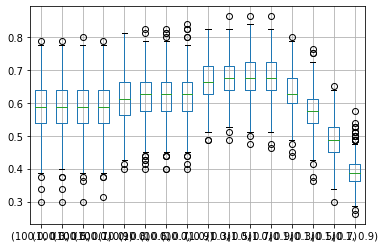

In [55]:
modeller.train_accuracies.boxplot()

In [ ]:
modeller.all_accuracies.reset_index().pivot_table(index="l1_ratio",columns="C", aggfunc="mean")["Value"]

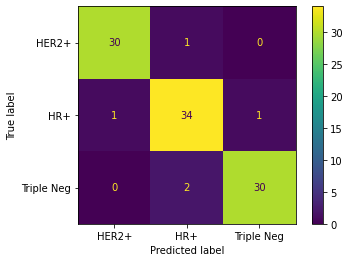

In [58]:
params = {"":0,"":0}
model = 
sss =


cm = confusion_matrix(data.index, modeller.predict(data))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=modeller.get_best_model().classes_)
disp.plot()

In [33]:
import scipy.stats as stats

stats.wilcoxon(modeller.predict(data), data.index)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [59]:
print(modeller.get_best_features())


[array([False, False, False, ..., False, False, False])]


In [32]:
modeller.all_accuracies
modeller.all_precision
modeller.all_recall

AttributeError: 'DCV' object has no attribute 'all_accuracies'

#todo
box plots accuracy, precision, recall
best model. and params features

save all the juicy info (params, and features)

In [10]:
modelName = "LR"
modeller.test_accuracy.to_csv("{}_test_accuracy.csv".format(modelName))
modeller.test_precision.to_csv("{}_test_precision.csv".format(modelName))
modeller.test_recall.to_csv("{}_test_recall.csv".format(modelName))
modeller.train_accuracies.to_csv("{}_train_accuracy.csv".format(modelName))
modeller.train_precision.to_csv("{}_train_precision.csv".format(modelName))
modeller.train_recall.to_csv("{}_train_recall.csv".format(modelName))
pd.DataFrame(modeller._best_features).to_csv("{}_features.csv".format(modelName))
pd.DataFrame(modeller._best_params).to_csv("{}_features.csv".format(modelName))

In [ ]:
method:
    hyperparam
    mean recall
    mean acc
    mean prec
    CI of all three

In [80]:
import math
print("accuracy:",modeller.test_accuracy.groupby(["C","l1_ratio"])["values"].mean().loc[1.0,0.7])
print("accuracy:",modeller.test_accuracy.groupby(["C","l1_ratio"])["values"].mean().loc[1.0,0.9])
print("precision:",modeller.test_precision.groupby(["C","l1_ratio"])["values"].mean().loc[1.0,0.7])
print("precision:",modeller.test_precision.groupby(["C","l1_ratio"])["values"].mean().loc[1.0,0.9])
print("recall:",modeller.test_recall.groupby(["C","l1_ratio"])["values"].mean().loc[1.0,0.7])
print("recall:",modeller.test_recall.groupby(["C","l1_ratio"])["values"].mean().loc[1.0,0.9])
ci95_hi = []
ci95_lo = []
stats = modeller.test_accuracy.groupby(["C","l1_ratio"])["values"].agg(['mean', 'count', 'std'])
for i, x in enumerate(stats.index):
    #print(i)
    m, c, s = stats.iloc[i]
    #print(m, c, s)
    ci95_hi += [m + 1.95*s/math.sqrt(c)]
    ci95_lo += [m - 1.95*s/math.sqrt(c)]
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats.loc[1.0,0.7])
print(stats.loc[1.0,0.9])


print()
print(pd.DataFrame([[1.0,0.7,0.59,0.59,0.59,"0.56-0.61"],[1.0,0.7,0.59,0.59,0.59,"0.57-0.60"]]


,columns=["C","l1_ratio", "Mean accuracy",
          "Mean precision", "Mean recall", "Confidence interval"]).to_latex(
    index=False,
    caption=("full_caption","short_caption"),
    col_space = [1/6 for x in range(6)]
))

accuracy: 0.5879999999999999
accuracy: 0.5873134328358208
precision: 0.5895082571749237
precision: 0.59777312930298
recall: 0.5883597883597886
recall: 0.5868869936034117
mean        0.588000
count      75.000000
std         0.105215
ci95_hi     0.611691
ci95_lo     0.564309
Name: (1.0, 0.7), dtype: float64
mean         0.587313
count      134.000000
std          0.095517
ci95_hi      0.603404
ci95_lo      0.571223
Name: (1.0, 0.9), dtype: float64

\begin{table}
\centering
\caption[short_caption]{full_caption}
\begin{tabular}{rrrrrl}
\toprule
  C &  l1\_ratio &  Mean accuracy &  Mean precision &  Mean recall & Confidence interval \\
\midrule
1.0 &       0.7 &           0.59 &            0.59 &         0.59 &           0.56-0.61 \\
1.0 &       0.7 &           0.59 &            0.59 &         0.59 &           0.57-0.60 \\
\bottomrule
\end{tabular}
\end{table}



<AxesSubplot:>

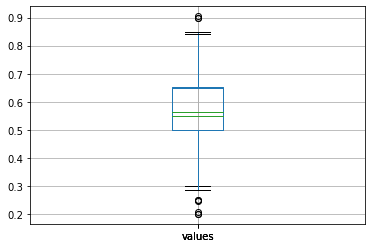